In [74]:
import pandas as pd
movie_pd=pd.read_csv('IMDB-Movie-Data.csv')
movie_pd

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [75]:
movie_pd['Year'].nunique()

11

# 折线图

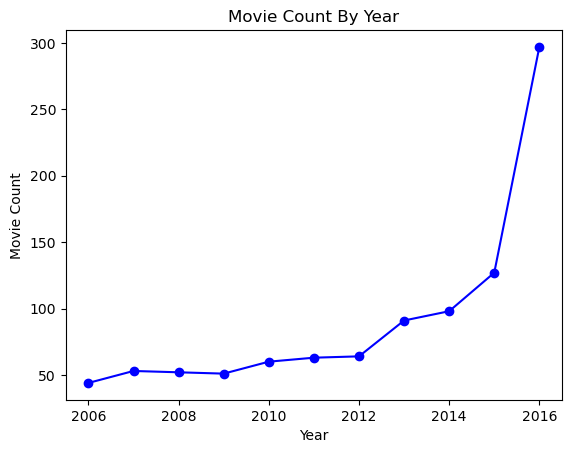

In [87]:
#line chart

import matplotlib.pyplot as plt
movie_count = movie_pd.groupby('Year').size().reset_index(name = 'Count')
movie_count.plot(x = 'Year', y = 'Count', color = 'b', marker = 'o', legend = False)
plt.title('Movie Count By Year')
plt.xlabel('Year')
plt.ylabel('Movie Count')
plt.savefig('折线图.jpg')
plt.show()


# 饼图

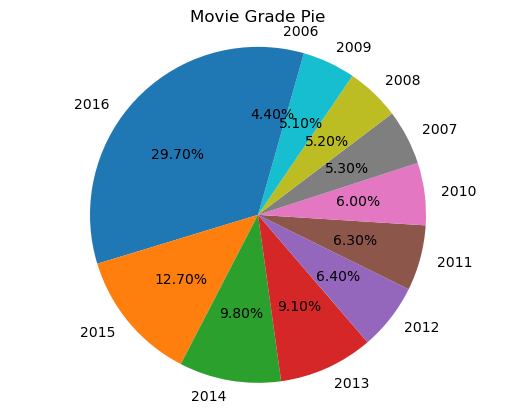

In [88]:
movie_pd['Year'].value_counts().plot(kind='pie', autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.title('Movie Grade Pie')	
plt.ylabel('')
plt.savefig('饼图.jpg')
plt.show()

# 热力图

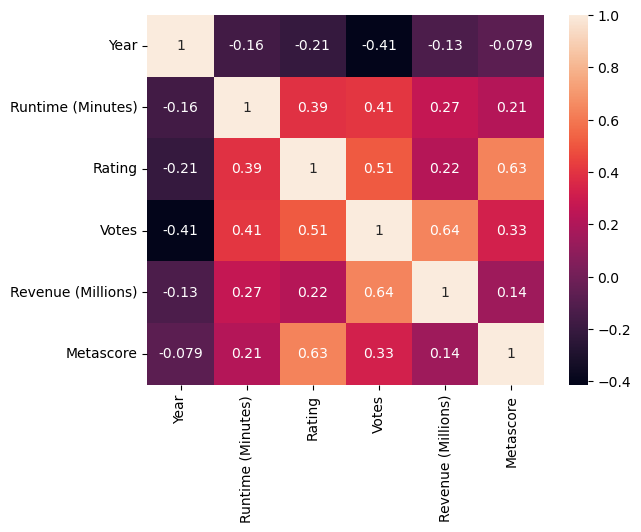

In [89]:
columns=['Year','Runtime (Minutes)','Rating','Votes','Revenue (Millions)','Metascore']
import seaborn as sns
heatmap_data=movie_pd[columns]
sns.heatmap(heatmap_data.corr(),annot=True)
plt.savefig('热力图.jpg')

In [ ]:
# 关系图

In [79]:
year=list(movie_pd['Year'].unique())
scores=[]
for i in year:
    scores.append(movie_pd[movie_pd.Year==i]['Rating'].mean())

In [90]:
from pyecharts import options as opts
from pyecharts.charts import Graph

nodes=[]
for i in range(len(year)):
    nodes.append({'name':str(year[i]),'symbolSize':scores[i]*5})
links = []
for i in nodes:
    for j in nodes:
        links.append({"source": i.get("name"), "target": j.get("name")})

c = Graph()
c.add("", nodes, links, repulsion=8000)
c.set_global_opts(title_opts=opts.TitleOpts(title="关系图"))
c.render("关系图.html")
c.render_notebook()
